# Heat Conduction Equition with a source term

## BACKGROUND STORY



Have you ever heard of the story of the rabbits in Australia? Unlike other stories, where usually rabbits stands for the goodness and kindness, also harmless, sometimes a little weak, makes people pity them, and wants to protect them,right? However, that might not be true in Australia, rabbits in Australia once brings a horrible nightmare to the Australian people. They invade Australia, conquered Australia, and almost force human to leave Australia. 

Wait, Are you kidding me? Are we talking about the same species? Are we even on the same planet? Are you come from Mars or somewhere further? Rabbits? That tiny lovely animal? Come on! this can't be true!

Well, It is true, and the war between humans and rabbits never ends, Australians are still fighting hard against that lovely little demon creature on this earth, not Mars or somewhere further. 

So, What happened? What's wrong with this lovely little creature? Can they use a gun to shoot? can they drive a tank? The answer is no, they cannot, but that doesn't mean they can't win. 

The war history tells like this, In the early 19th century, we human took some rabbits to the newly discovered land of Australia as a source of food, they were prisoners in cages, and everything is perfectly fine. However, in 1859, a man named Thomas Austin, the hero of Australian rabbits, released only 24 rabbits on his property, Barwon Park, near Winchelsea, Victoria, for a hunting purpose. 

After those 24 rabbits were free, they start wondering, where are we? why there is no eagles and foxes? Are we in paradise? HAHAHAHA!!

Yes, that's the beginning of the war, and soon humans found out that the rabbits were out of control, and tried to limit their numbers, but most of the methods were in vain, including buiding a "Great Wall" to sto the spread of the rabbits, though rabbits cannot fly across that "Great Wall", they are good at digging holes, and soon the Wall-building-method turns to a failure.Another method is introducing foxes into Australia so that the foxes will eat up the rabbits and control the amount of rabbits, but the foxes betrayed the trust of humans and turn to eat other local animals in Australia, and even threats sheeps that most Australian families rely on, and humans have to eliminate foxes as well...Nice try!!

Rabbits keeps winning and winning, and humans suffers a lot, rabbits ate up almost all the grass and corps, and we don't have a way to stop them! In 1896,they appeared in Queensland, which is almost 2500 km far away from where they were freed, and a research showed that there is about 36 million rabbits in New South Wales, and the total number of rabbits might greater than a hundred million! In 1907, they were believed to be everywhere in Australia, and in 1926, another research showed that there might be 10 billion of rabbits in Australia!!

We might consider that we were loosing that war before 1926, after a few years in 1950s, we human start winning by using bioweapons, and now there is some kind of a "balance" between humans and rabbits. The war is still on going!!

## MATH MODEL



Anyway, this topic greatly suits a project of using the diffusion equation with a source term, which is: 


\begin{equation}
\frac{\partial p}{\partial t} = \alpha \left(\frac{\partial^2 p}{\partial x^2} + \frac{\partial^2 p}{\partial y^2} \right) + Q(p)
\end{equation}


Where p is the population, and the source term Q is a function of the population, probably is 


\begin{equation}
Q(p) = r p
\end{equation}


where r stands for the growth rate of the population, usually r is also a function of p, which means that the growth rate varies with different amount of population, if the population is low, r could be high, and if the population is high enough, r could be very small. But let's consider r to be a constant for now.



What about $\alpha$ ?Well, I'm very sorry to say that I tried to find some physical meaning for this constant, but failed, so let's just keep it there and use some information to find a reasonable number instead!!!!!!

By using what we have learned in the 4th chapter, we can tell the numerical equation is:

\begin{equation}
p^{n+1}_{i,j}= p^n_{i,j} + \alpha \left( \frac{\Delta t}{\Delta x^2} (p^n_{i+1, j} - 2p^n_{i,j} + p^n_{i-1,j}) + \\\frac{\Delta t}{\Delta y^2} (p^n_{i, j+1} - 2p^n_{i,j} + p^n_{i,j-1})\right) +Q(p){\Delta t}
\end{equation}

If we regard dx and dy are the same, which is:\begin{equation}{\Delta x} = {\Delta y}\end{equation}
We can have:
\begin{equation}
p^{n+1}_{i,j}= p^n_{i,j} + \alpha \frac{\Delta t}{\Delta x^2}\left(  p^n_{i+1, j} - 4p^n_{i,j} + p^n_{i-1,j} + \\\ p^n_{i, j+1} + p^n_{i,j-1}\right) +Q(p){\Delta t}
\end{equation}

## START SOLVING!

Now is the time to set our problems, By googling "Australia", we can find that Australia is about 4000km long in the east-west direction and 3700km in the north-south direction, so we can have our dx = 100km to make a 37 * 40 matrix representing our "Australia"!

And we can use "1 month" as dt, and measure everything in months.

In [3]:
dx = 100
dt = 1

Now let's list the information that we are going to use.

1, In 1859, Thomas Austin released 24 rabbits near Winchelsea, Victoria.

2, In around 1896, rabbits reached Queensland, and the total number may beyond 100 million

3, In 1907, they were spread to all over Australia.

4, In 1926, the number reached 10 billion.

In [73]:
import numpy
from matplotlib import pyplot,cm
%matplotlib inline
from IPython.display import Image

Now, let's start from 1859 and try to calculate the growth rate to match the total population in 1896! In 1896,people first observed rabbits in Queensland, but how do we define "observed"? Why don't we make an asumption that when there is 100 rabbits in a 100km * 100km square, they are observable. And the total number of rabbits were probably around 100 million, we can use this information to adjust the value of $\alpha$ to make the total number of rabbits around 100 million.

此处有图

By looking at the map, we can assume that Thomas Austin released the first 24 rabbits in p[0,30] eg.the yellow star near Melbourne, and Queensland is about 14 squares away, which is [14,30],the red area

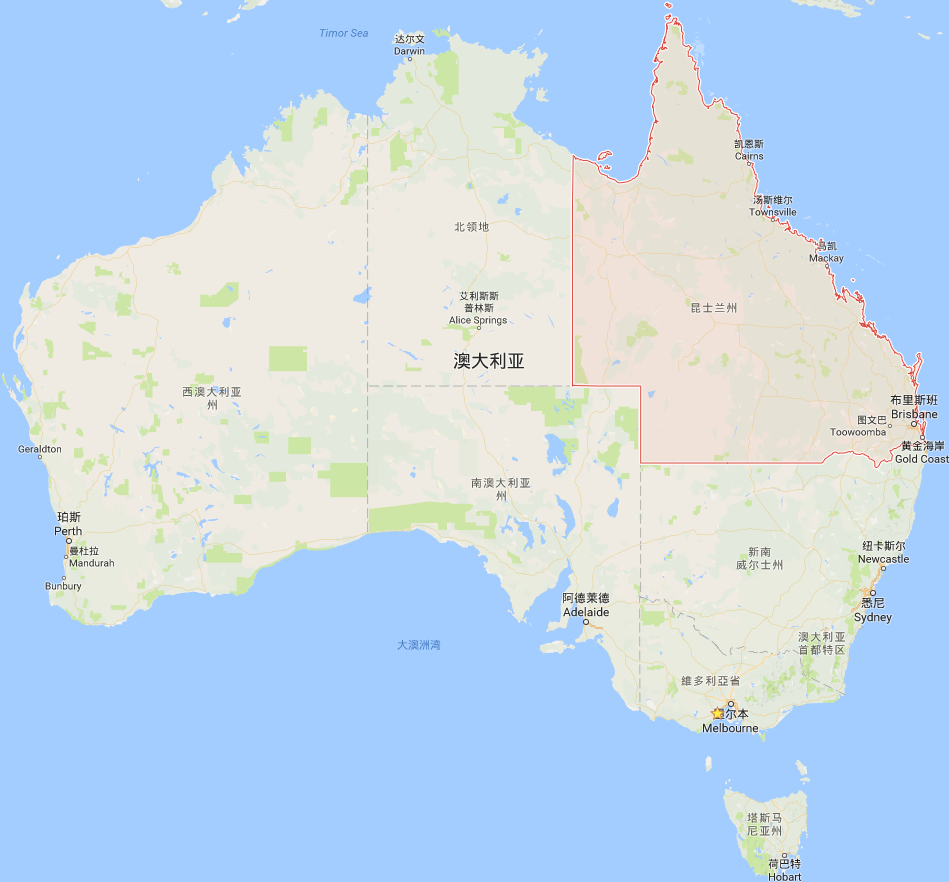

In [201]:
Image(filename='1.png')

In [74]:
p_initial = numpy.zeros((37,40))
p_initial[0,30] = 24

## START CODING!!

Before coding, there is one problem: how can we make sure that after 37 years, the number of p[14,30] is just reached 100?

Certainly we don't want to do the calculation by hand, We can do it by using a while loop outside the loop of step calculations, if the result don't match what we want, we can simply change a little bit and let the code run again! Until we got the answer we want.

In [75]:
def year_1859_to_1896(p_initial,dx,dt):
    """ 
    calculate the distribution of the density ofrabbits populations from 1859 to 1896, 
    with alpha = 89.5 to adjust the population to be around 100 million
    
    
    Parameters:
    ----------
    p_initial: initial condition
    dx: in this project, dx = 100 is suggested,stands for 100 km
    dt: in this project, dt = 1 is suggested, stands for 1 month
    
    Returns:
    -------
    p: a 37 * 40 matrix, the population of the rabbits distribution in 1896
    growth_rate: the growth rate that make sure after 444 months eg. from 1859 to 1896, the rabbits can reach the Queensland.
    """

    
    
    months = 0
    growth_rate = 0.005
    p_n = numpy.zeros_like(p_initial)
    p = p_initial.copy()
    
    
    while months != 444:                   #444 = 12 months/year * 37 years， and if the result does't match 444 months, 
                                            #                                  cauculate again until it's 444!
        months = 0
        p = p_initial.copy()
        
        
        
        while p[14,30]<100:             # when the local population reaches 100, we consider they can be observed!
            p_n = p.copy()
            p[1:-1,1:-1] = (1 + growth_rate*dt)*p_n[1:-1,1:-1] + 89.5*dt/dx**2 * (p_n[1:-1,:-2] + p_n[1:-1,2:] + p_n[:-2,1:-1] + p_n[2:,1:-1] - \
                                                                                      4*p_n[1:-1,1:-1])
            
                                            #here we take alpha  = 89.5 
                                            #in order to make sure that the total population is around 100 million according to the information we have
                
            p[0,:] = p[1,:]                 #Boundary Conditions, since the rabbits cannot fly, which makes no "rabbit flow" on the boundary. 
            p[-1,:] = p[-2,:]               #So we use Neumann boundary conditions to the four boundaries!!
            p[:,0] = p[:,1]
            p[:,-1] = p[:,-2]
            
            
            months = months + 1
            
            
            
        if months > 444:                  #check out if the total time steps matches 444, 
            growth_rate = growth_rate*1.5 #if it's larger than 444, means that the growth rate is too low, so we redo the calculation with 1.5 times the growth rate, 
        elif months < 444:               #or if months were smaller than 444, which means they grow too fast, so we half the growth rate!
            growth_rate = growth_rate*0.5
            
            
    return p, growth_rate      

CHECK THE RESULT!!

In [76]:
p_1896, growth_rate_1896 = year_1859_to_1896(p_initial,dx,dt)

In [77]:
print("The average growth rate between 1859 and 1896 is",growth_rate_1896)


The average growth rate between 1859 and 1896 is 0.04547229100934768


In [78]:
numpy.sum(p_1896)

99462365.26399982

let's plot the result!

In [79]:
x = numpy.linspace(0, 4000, 40)
y = numpy.linspace(0, 3700, 37)
X, Y = numpy.meshgrid(x,y)

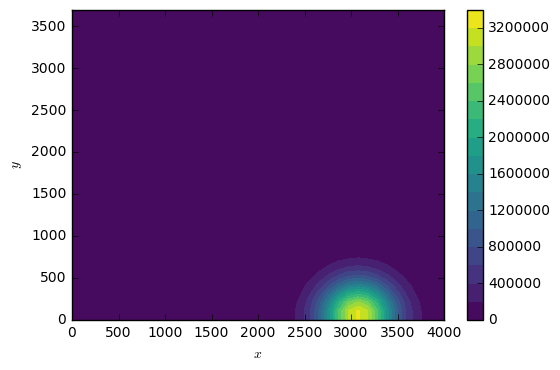

In [80]:
pyplot.contourf(X,Y,p_1896,20,cmap=cm.viridis)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar();

Well, we can see that the population of the rabbits are spreading, although they seems not very fast, but the population density is enormous at the bottom-right area!!!

In [88]:
def year_1896_to_1926(p_initial, dx, dt):
    
    
    
    months = 0
    growth_rate = 0.005
    p_n = numpy.zeros_like(p_initial)
    p = p_initial.copy()
    
    
    while months != 360:                   #444 = 12 months/year * 37 years， and if the result does't match 444 months, 
                                            #                                  cauculate again until it's 444!
        months = 0
        p = p_initial.copy()
        
        
        
        while numpy.sum(p)<10000000000:             # when the local population reaches 100, we consider they can be observed!
            p_n = p.copy()
            p[1:-1,1:-1] = (1 + growth_rate*dt)*p_n[1:-1,1:-1] + 895*dt/dx**2 * (p_n[1:-1,:-2] + p_n[1:-1,2:] + p_n[:-2,1:-1] + p_n[2:,1:-1] - \
                                                                                      4*p_n[1:-1,1:-1])
            
                                            #here we take alpha  = 89.5 
                                            #in order to make sure that the total population is around 100 million according to the information we have
                
            p[0,:] = p[1,:]                 #Boundary Conditions, since the rabbits cannot fly, which makes no "rabbit flow" on the boundary. 
            p[-1,:] = p[-2,:]               #So we use Neumann boundary conditions to the four boundaries!!
            p[:,0] = p[:,1]
            p[:,-1] = p[:,-2]
            
            
            months = months + 1
            
            
            
        if months > 360:                  #check out if the total time steps matches 444, 
            growth_rate = growth_rate*1.5 #if it's larger than 444, means that the growth rate is too low, so we redo the calculation with 1.5 times the growth rate, 
        elif months < 360:                #or if months were smaller than 444, which means they grow too fast, so we half the growth rate!
            growth_rate = growth_rate*0.5
            
            
    return p, growth_rate      

In [89]:
p_1926, growth_rate_1926 = year_1896_to_1926(p_1896,100,1)

In [90]:
numpy.sum(p_1926)

10055620969.632235

In [91]:
growth_rate_1926

0.013208920500215809

In [92]:
x = numpy.linspace(0, 4000, 40)
y = numpy.linspace(0, 3700, 37)
X, Y = numpy.meshgrid(x,y)

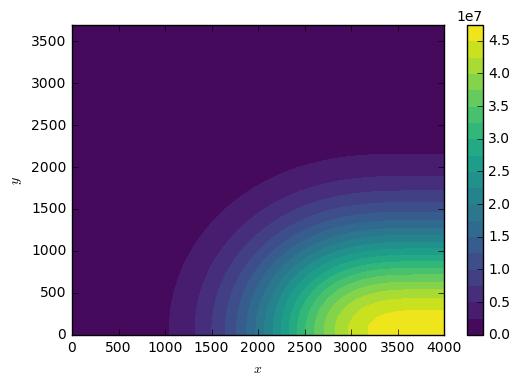

In [93]:
pyplot.contourf(X,Y,p_1926,20,cmap=cm.viridis)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar();

In [72]:
p_1907[-1,:]

array([  1.04722893e+02,   1.04722893e+02,   3.76269844e+02,
         1.56628089e+03,   6.36821927e+03,   2.50280590e+04,
         9.49415928e+04,   3.47246512e+05,   1.22317493e+06,
         4.14477085e+06,   1.34939321e+07,   4.21539914e+07,
         1.26184859e+08,   3.61425821e+08,   9.89048024e+08,
         2.58173702e+09,   6.41771348e+09,   1.51658701e+10,
         3.40084831e+10,   7.22314589e+10,   1.45026531e+11,
         2.74723750e+11,   4.90016132e+11,   8.21356602e+11,
         1.29128324e+12,   1.90054918e+12,   2.61435418e+12,
         3.35600397e+12,   4.01522037e+12,   4.47319713e+12,
         4.63769498e+12,   4.47405999e+12,   4.01775995e+12,
         3.36240819e+12,   2.62951590e+12,   1.93455644e+12,
         1.36351435e+12,   9.66383037e+11,   7.64739851e+11,
         7.64739851e+11])

In [53]:
p_1896[-2,1]

4.0405044698563408e-33

In [3]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [183]:
def year_1859_to_1896(p_initial):
    
    dt = 1    #1 month
    dx = 100    #10 km
    
    
    months = 0
    growth_rate = 0.005
    p_n = numpy.zeros_like(p_initial)
    p = p_initial.copy()
    
    
    while months != 444:                   #444 = 12 months * 37 years
        months = 0
        p = p_initial.copy()
        
        
        
        while p[14,30] <= 100:
            p_n = p.copy()
            p[1:-1,1:-1] = (1 + growth_rate*dt)*p_n[1:-1,1:-1] + 89.5*dt/dx**2 * (p_n[1:-1,:-2] + p_n[1:-1,2:] + p_n[:-2,1:-1] + p_n[2:,1:-1] - \
                                                                                      4*p_n[1:-1,1:-1])
            
            p[0,:] = p[1,:]
            p[-1,:] = p[-2,:]
            p[:,0] = p[:,1]
            p[:,-1] = p[:,-2]
            
            
            months = months + 1
            
            
            
        if months > 444:
            growth_rate = growth_rate*1.5
        elif months < 444:
            growth_rate = growth_rate*0.5
            
            
    return p, growth_rate                    

In [184]:
p_initial = numpy.zeros((37,40))
p_initial[0,30] = 24

In [185]:
p_1896, growth_rate_1896 = year_1859_to_1896(p_initial)

In [186]:
numpy.sum(p_1896)

99462365.26399982

In [10]:
growth_rate_1896

0.04547229100934768